In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

# Set plot style for seaborn
sns.set(style="whitegrid")

# Function to load a dataset and handle errors
def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded {file_path}")
        return df
    except FileNotFoundError:
        print(f"Error: {file_path} not found.")
        return pd.DataFrame()  # Return an empty DataFrame if file is not found

# Load Datasets
datasets = {
    "assessments": "assessments.csv",
    "courses": "courses.csv",
    "student_assessment": "studentAssessment.csv",
    "student_registration": "studentRegistration.csv",
    "vle": "vle.csv",
    "student_vle": "studentVle.csv"
}

dataframes = {name: load_dataset(path) for name, path in datasets.items()}

# Display the first few rows of each dataset to verify loading
for name, df in dataframes.items():
    if not df.empty:  # Only display if the DataFrame is not empty
        print(f"First few rows of {name} dataset:")
        display(df.head())

# Verify the columns in the studentVle dataset
if not dataframes["student_vle"].empty:
    print("Columns in studentVle:", dataframes["student_vle"].columns)

# Data Exploration
for name, df in dataframes.items():
    if not df.empty:
        print(f"\nMissing values in {name} dataset:")
        print(df.isnull().sum())
        print(f"\nData types in {name} dataset:")
        print(df.dtypes)
        print(f"\nBasic statistics for {name} dataset:")
        print(df.describe(include='all'))

# Data Cleaning
# Handle missing values
if not dataframes["assessments"].empty:
    dataframes["assessments"]["date"].fillna(dataframes["assessments"]["date"].mean(), inplace=True)

if not dataframes["student_registration"].empty:
    dataframes["student_registration"]["date_registration"].fillna(-1, inplace=True)
    dataframes["student_registration"]["date_unregistration"].fillna(-1, inplace=True)

for name in ["courses", "student_assessment", "vle"]:
    if not dataframes[name].empty:
        dataframes[name].dropna(inplace=True)

# Verify that there are no more missing values
for name, df in dataframes.items():
    if not df.empty:
        print(f"\nMissing values in {name} dataset after cleaning:")
        print(df.isnull().sum())

# Correct data types
if not dataframes["assessments"].empty:
    dataframes["assessments"]["date"] = dataframes["assessments"]["date"].astype(int)

if not dataframes["student_registration"].empty:
    dataframes["student_registration"]["date_registration"] = dataframes["student_registration"]["date_registration"].astype(int)
    dataframes["student_registration"]["date_unregistration"] = dataframes["student_registration"]["date_unregistration"].astype(int)

# Verify data types
for name in ["assessments", "student_registration"]:
    if not dataframes[name].empty:
        print(f"\nData types in {name} dataset after type correction:")
        print(dataframes[name].dtypes)

# Remove duplicates
for name, df in dataframes.items():
    if not df.empty:
        df.drop_duplicates(inplace=True)
        print(f"\nNumber of duplicate rows in {name} dataset after cleaning:")
        print(df.duplicated().sum())

# Data Transformation
# Example: Normalize numerical features in the assessments dataset
if not dataframes["assessments"].empty:
    scaler = StandardScaler()
    dataframes["assessments"][["date", "weight"]] = scaler.fit_transform(dataframes["assessments"][["date", "weight"]])

# Example: Encode categorical features in the courses dataset
if not dataframes["courses"].empty:
    dataframes["courses"] = pd.get_dummies(dataframes["courses"], columns=["code_module", "code_presentation"])

# Display transformed data
for name in ["assessments", "courses"]:
    if not dataframes[name].empty:
        print(f"\nTransformed data in {name} dataset:")
        display(dataframes[name].head())

# Continue with further analysis or modeling steps

Successfully loaded assessments.csv
Successfully loaded courses.csv
Successfully loaded studentAssessment.csv
Successfully loaded studentRegistration.csv
Successfully loaded vle.csv
Successfully loaded studentVle.csv
First few rows of assessments dataset:


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


First few rows of courses dataset:


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


First few rows of student_assessment dataset:


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


First few rows of student_registration dataset:


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


First few rows of vle dataset:


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


First few rows of student_vle dataset:


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


Columns in studentVle: Index(['code_module', 'code_presentation', 'id_student', 'id_site', 'date',
       'sum_click'],
      dtype='object')

Missing values in assessments dataset:
code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

Data types in assessments dataset:
code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

Basic statistics for assessments dataset:
       code_module code_presentation  id_assessment assessment_type  \
count          206               206     206.000000             206   
unique           7                 4            NaN               3   
top            FFF             2014J            NaN             TMA   
freq            52                57            NaN             106   
mean           NaN               NaN   

C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_64912\3301992720.py:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframes["assessments"]["date"].fillna(dataframes["assessments"]["date"].mean(), inplace=True)
C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_64912\3301992720.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

Data types in assessments dataset after type correction:
code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                   int32
weight               float64
dtype: object

Data types in student_registration dataset after type correction:
code_module            object
code_presentation      object
id_student              int64
date_registration       int32
date_unregistration     int32
dtype: object

Number of duplicate rows in assessments dataset after cleaning:
0

Number of duplicate rows in courses dataset after cleaning:
0

Number of duplicate rows in student_assessment dataset after cleaning:
0

Number of duplicate rows in student_registration dataset after cleaning:
0

Number of duplicate rows in vle dataset after cleaning:
0

Number of duplicate rows in stud

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,-1.708441,-0.358748
1,AAA,2013J,1753,TMA,-1.233892,-0.028828
2,AAA,2013J,1754,TMA,-0.379705,-0.028828
3,AAA,2013J,1755,TMA,0.284663,-0.028828
4,AAA,2013J,1756,TMA,0.949032,0.301092



Transformed data in courses dataset:


,module_presentation_length,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,268,True,False,False,False,False,False,False,False,True,False,False
1,269,True,False,False,False,False,False,False,False,False,False,True
2,268,False,True,False,False,False,False,False,False,True,False,False
3,262,False,True,False,False,False,False,False,False,False,False,True
4,240,False,True,False,False,False,False,False,True,False,False,False


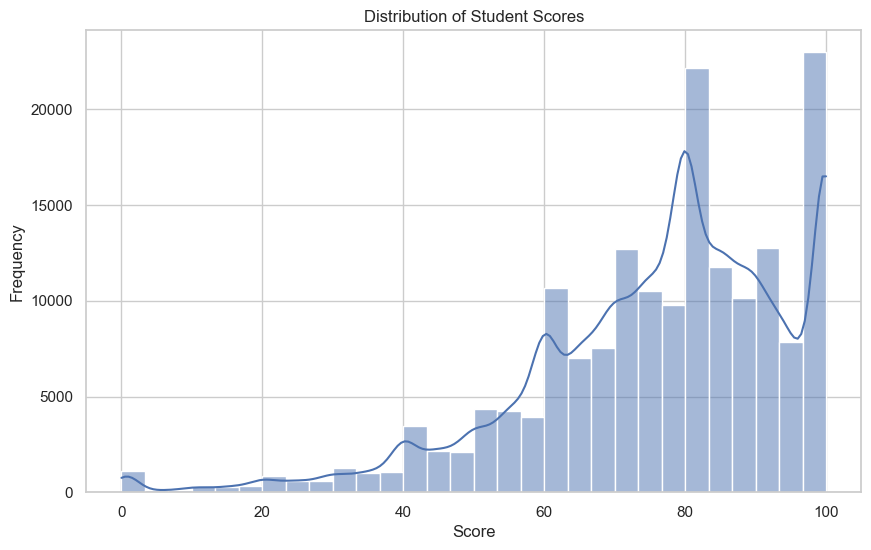

In [2]:
# Exploratory Data Analysis (EDA)

# Import necessary plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Distribution of scores in the student assessment dataset
if not dataframes["student_assessment"].empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataframes["student_assessment"]["score"], bins=30, kde=True)
    plt.title("Distribution of Student Scores")
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.show()



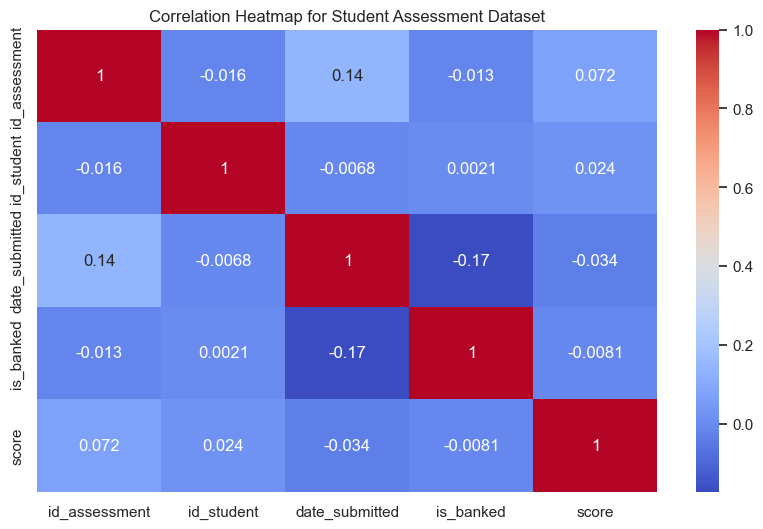

In [3]:
# Example: Correlation heatmap for student assessment dataset
if not dataframes["student_assessment"].empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframes["student_assessment"].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap for Student Assessment Dataset")
    plt.show()

Mean Squared Error: 347.80
R2 Score: 0.01


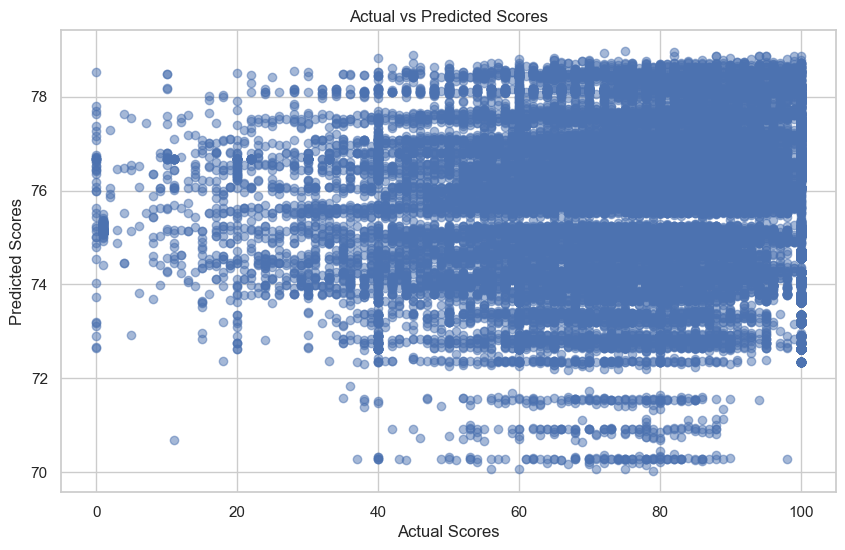

In [4]:
# Data Modeling

# Prepare data for modeling
if not dataframes["student_assessment"].empty:
    # Select features and target
    features = ["id_assessment", "date_submitted", "is_banked"]
    target = "score"
    
    X = dataframes["student_assessment"][features]
    y = dataframes["student_assessment"][target]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

    # Plot actual vs predicted scores
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title("Actual vs Predicted Scores")
    plt.xlabel("Actual Scores")
    plt.ylabel("Predicted Scores")
    plt.show()

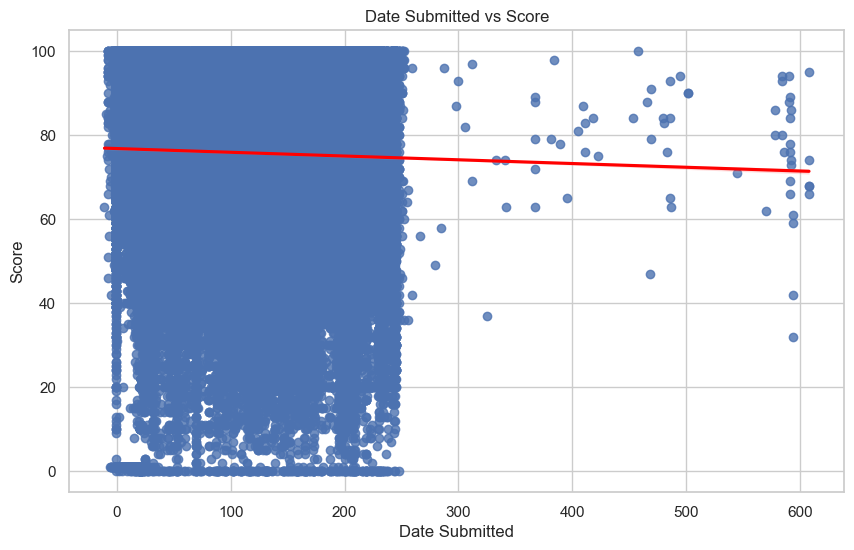

In [5]:
# Visualization

# Example: Scatter plot of date_submitted vs score with regression line
if not dataframes["student_assessment"].empty:
    plt.figure(figsize=(10, 6))
    sns.regplot(x="date_submitted", y="score", data=dataframes["student_assessment"], line_kws={"color": "red"})
    plt.title("Date Submitted vs Score")
    plt.xlabel("Date Submitted")
    plt.ylabel("Score")
    plt.show()

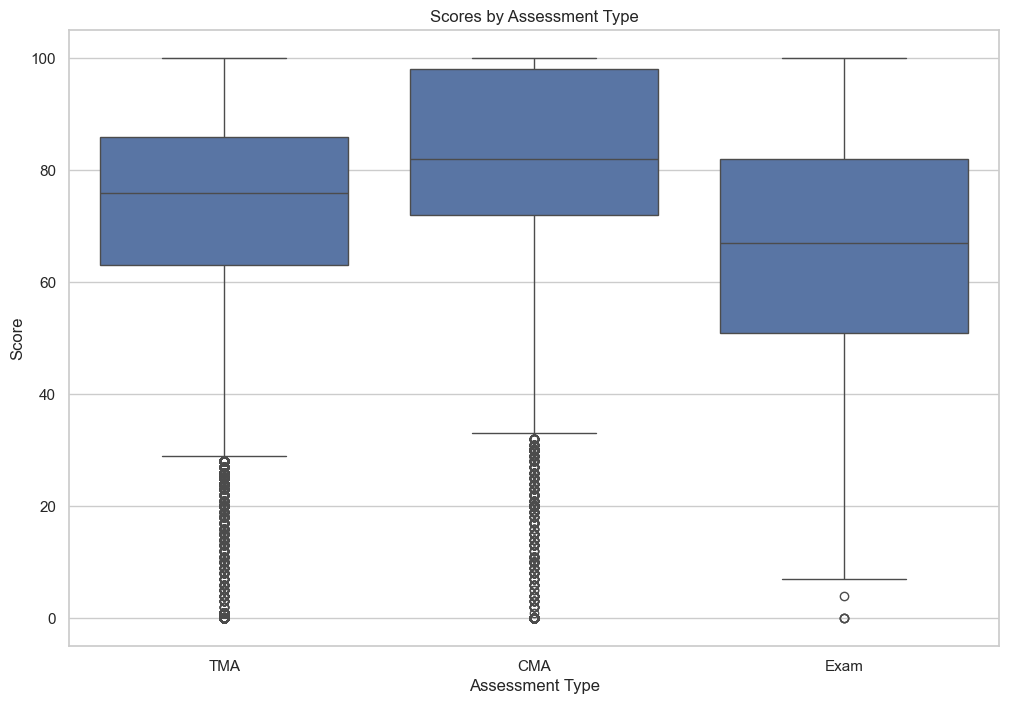

In [6]:
# Example: Box plot of scores by assessment type
if not dataframes["assessments"].empty and not dataframes["student_assessment"].empty:
    # Merge datasets to include assessment type
    merged_df = pd.merge(dataframes["student_assessment"], dataframes["assessments"], on="id_assessment")
    plt.figure(figsize=(12, 8))
    sns.boxplot(x="assessment_type", y="score", data=merged_df)
    plt.title("Scores by Assessment Type")
    plt.xlabel("Assessment Type")
    plt.ylabel("Score")
    plt.show()

In [7]:
# Descriptive Statistics and Data Exploration

# Example: Summary statistics for the assessments dataset
if not dataframes["assessments"].empty:
    print("Summary statistics for the assessments dataset:")
    display(dataframes["assessments"].describe())

Summary statistics for the assessments dataset:


,id_assessment,date,weight
count,206.000000,2.060000e+02,2.060000e+02
mean,26473.975728,6.898473e-17,6.036164e-17
std,10098.625521,1.002436e+00,1.002436e+00
min,1752.000000,-1.803351e+00,-6.886678e-01
25%,15023.250000,-8.644224e-01,-6.886678e-01
50%,25364.500000,3.383052e-02,-2.762679e-01
75%,34891.750000,1.043941e+00,1.113880e-01
max,40088.000000,1.572724e+00,2.610531e+00


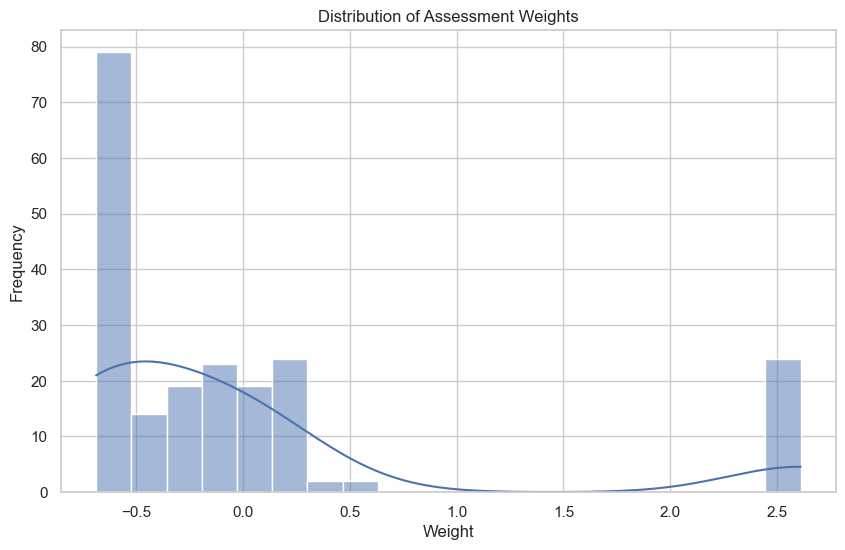

In [8]:
# Example: Distribution of assessment weights
if not dataframes["assessments"].empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataframes["assessments"]["weight"], bins=20, kde=True)
    plt.title("Distribution of Assessment Weights")
    plt.xlabel("Weight")
    plt.ylabel("Frequency")
    plt.show()

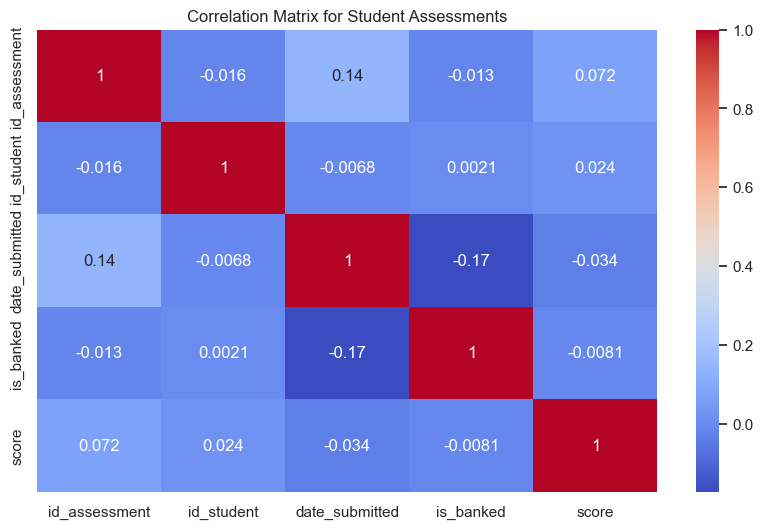

In [9]:
# Example: Correlation matrix for student assessments
if not dataframes["student_assessment"].empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframes["student_assessment"].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix for Student Assessments")
    plt.show()

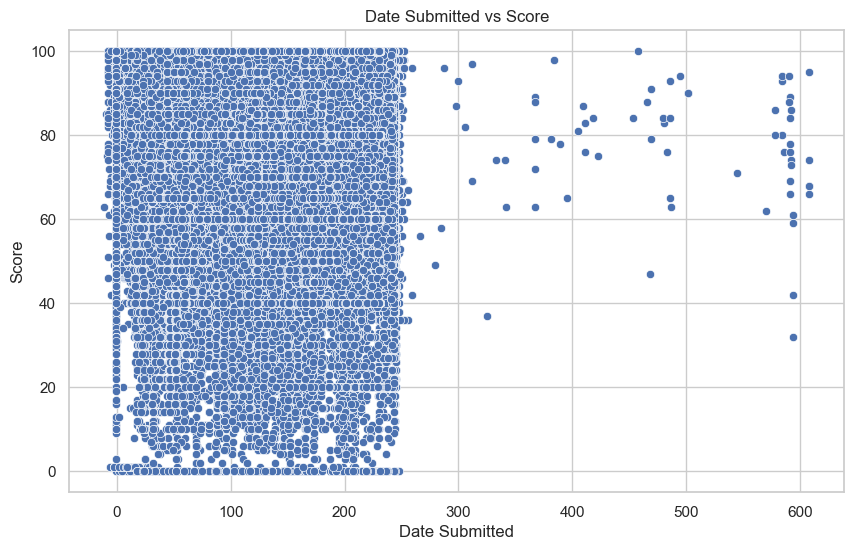

In [10]:
# Example: Scatter plot of date_submitted vs score
if not dataframes["student_assessment"].empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="date_submitted", y="score", data=dataframes["student_assessment"])
    plt.title("Date Submitted vs Score")
    plt.xlabel("Date Submitted")
    plt.ylabel("Score")
    plt.show()

Mean Squared Error: 347.80
R2 Score: 0.01


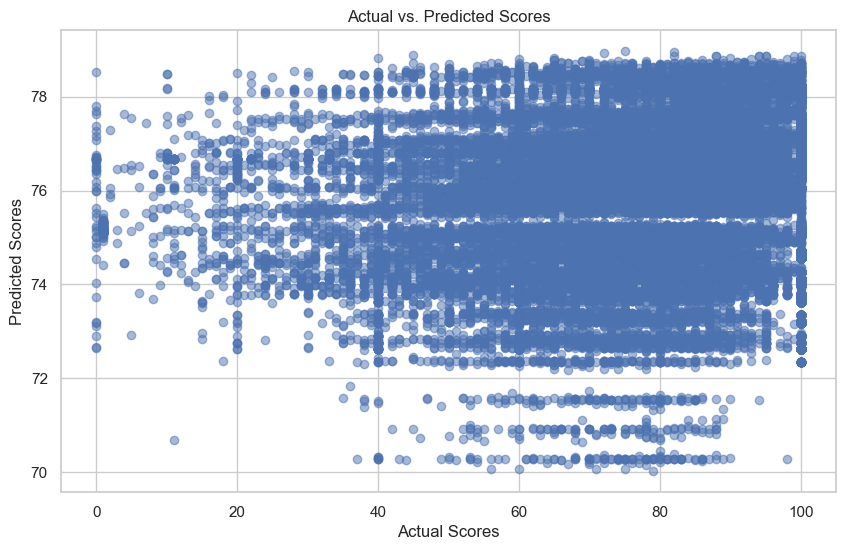

In [12]:
# Predictive Modeling

# Prepare data for modeling
if not dataframes["student_assessment"].empty:
    # Select features and target
    features = ["id_assessment", "date_submitted", "is_banked"]
    target = "score"
    
    X = dataframes["student_assessment"][features]
    y = dataframes["student_assessment"][target]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

    # Plot actual vs. predicted scores
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title("Actual vs. Predicted Scores")
    plt.xlabel("Actual Scores")
    plt.ylabel("Predicted Scores")
    plt.show()

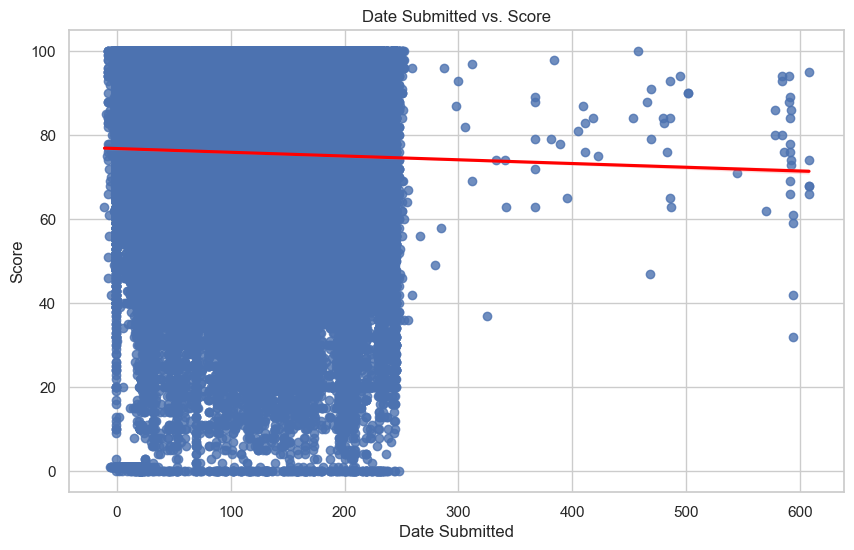

In [14]:
# Example: Scatter plot of date_submitted vs. score with regression line
if not dataframes["student_assessment"].empty:
    plt.figure(figsize=(10, 6))
    sns.regplot(x="date_submitted", y="score", data=dataframes["student_assessment"], line_kws={"color": "red"})
    plt.title("Date Submitted vs. Score")
    plt.xlabel("Date Submitted")
    plt.ylabel("Score")
    plt.show()

In [15]:
# Statistical Analysis

import scipy.stats as stats

# Example: Hypothesis test for the mean score of different assessment types
if not dataframes["assessments"].empty and not dataframes["student_assessment"].empty:
    # Merge datasets to include assessment type
    merged_df = pd.merge(dataframes["student_assessment"], dataframes["assessments"], on="id_assessment")

    # Perform t-test between TMA and Exam scores
    tma_scores = merged_df[merged_df["assessment_type"] == "TMA"]["score"]
    exam_scores = merged_df[merged_df["assessment_type"] == "Exam"]["score"]

    t_stat, p_value = stats.ttest_ind(tma_scores, exam_scores, nan_policy='omit')
    print(f"T-test between TMA and Exam scores: t-statistic = {t_stat:.2f}, p-value = {p_value:.2f}")

# Example: Correlation test between date_submitted and score
if not dataframes["student_assessment"].empty:
    corr, p_value = stats.pearsonr(dataframes["student_assessment"]["date_submitted"], dataframes["student_assessment"]["score"])
    print(f"Correlation between date_submitted and score: correlation = {corr:.2f}, p-value = {p_value:.2f}")

T-test between TMA and Exam scores: t-statistic = 25.90, p-value = 0.00
Correlation between date_submitted and score: correlation = -0.03, p-value = 0.00


In [ ]:
https://github.com/copilot/c/bdc3339a-f32b-4ee9-b1dd-eb331c45daf4

In [16]:
# Data Cleaning and Preparation
import pandas as pd
import numpy as np

# Load Datasets
datasets = {
    "assessments": "assessments.csv",
    "courses": "courses.csv",
    "student_assessment": "studentAssessment.csv",
    "student_registration": "studentRegistration.csv",
    "vle": "vle.csv",
    "student_vle": "studentVle.csv"
}

dataframes = {name: pd.read_csv(path) for name, path in datasets.items()}

# Handle missing values
for name, df in dataframes.items():
    if name == "assessments":
        df["date"].fillna(df["date"].mean(), inplace=True)
    elif name == "student_registration":
        df["date_registration"].fillna(-1, inplace=True)
        df["date_unregistration"].fillna(-1, inplace=True)
    else:
        df.dropna(inplace=True)
    dataframes[name] = df

# Correct data types
dataframes["assessments"]["date"] = dataframes["assessments"]["date"].astype(int)
dataframes["student_registration"]["date_registration"] = dataframes["student_registration"]["date_registration"].astype(int)
dataframes["student_registration"]["date_unregistration"] = dataframes["student_registration"]["date_unregistration"].astype(int)

# Remove duplicates
for name, df in dataframes.items():
    df.drop_duplicates(inplace=True)
    dataframes[name] = df

print("Data cleaning and preparation completed.")

C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_64912\1094749173.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["date"].fillna(df["date"].mean(), inplace=True)
C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_64912\1094749173.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Data cleaning and preparation completed.


Summary statistics for the assessments dataset:


,code_module,code_presentation,id_assessment,assessment_type,date,weight
count,206,206,206.000000,206,206.000000,206.000000
unique,7,4,NaN,3,NaN,NaN
top,FFF,2014J,NaN,TMA,NaN,NaN
freq,52,57,NaN,106,NaN,NaN
mean,NaN,NaN,26473.975728,NaN,145.004854,20.873786
std,NaN,NaN,10098.625521,NaN,73.933952,30.384224
min,NaN,NaN,1752.000000,NaN,12.000000,0.000000
25%,NaN,NaN,15023.250000,NaN,81.250000,0.000000
50%,NaN,NaN,25364.500000,NaN,147.500000,12.500000
75%,NaN,NaN,34891.750000,NaN,222.000000,24.250000


Summary statistics for the courses dataset:


,code_module,code_presentation,module_presentation_length
count,22,22,22.000000
unique,7,4,NaN
top,BBB,2014J,NaN
freq,4,7,NaN
mean,NaN,NaN,255.545455
std,NaN,NaN,13.654677
min,NaN,NaN,234.000000
25%,NaN,NaN,241.000000
50%,NaN,NaN,261.500000
75%,NaN,NaN,268.000000


Summary statistics for the student_assessment dataset:


,id_assessment,id_student,date_submitted,is_banked,score
count,173739.000000,1.737390e+05,173739.000000,173739.000000,173739.000000
mean,26555.615826,7.052474e+05,116.020226,0.010982,75.799573
std,8829.999907,5.524822e+05,71.479612,0.104218,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044660e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852220e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.345000e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


Summary statistics for the student_registration dataset:


,code_module,code_presentation,id_student,date_registration,date_unregistration
count,32593,32593,3.259300e+04,32593.000000,32593.000000
unique,7,4,NaN,NaN,NaN
top,BBB,2014J,NaN,NaN,NaN
freq,7909,11260,NaN,NaN,NaN
mean,NaN,NaN,7.066877e+05,-69.316847,14.685301
std,NaN,NaN,5.491673e+05,49.292003,51.490677
min,NaN,NaN,3.733000e+03,-322.000000,-365.000000
25%,NaN,NaN,5.085730e+05,-100.000000,-1.000000
50%,NaN,NaN,5.903100e+05,-57.000000,-1.000000
75%,NaN,NaN,6.444530e+05,-29.000000,-1.000000


Summary statistics for the vle dataset:


,id_site,code_module,code_presentation,activity_type,week_from,week_to
count,1121.000000,1121,1121,1121,1121.000000,1121.000000
unique,NaN,7,4,11,NaN,NaN
top,NaN,FFF,2013J,oucontent,NaN,NaN
freq,NaN,826,392,381,NaN,NaN
mean,776466.992864,NaN,NaN,NaN,15.204282,15.214987
std,86423.811891,NaN,NaN,NaN,8.792865,8.779806
min,526755.000000,NaN,NaN,NaN,0.000000,0.000000
25%,716659.000000,NaN,NaN,NaN,8.000000,8.000000
50%,779389.000000,NaN,NaN,NaN,15.000000,15.000000
75%,882586.000000,NaN,NaN,NaN,22.000000,22.000000


Summary statistics for the student_vle dataset:


,code_module,code_presentation,id_student,id_site,date,sum_click
count,9868110,9868110,9.868110e+06,9.868110e+06,9.868110e+06,9.868110e+06
unique,7,4,NaN,NaN,NaN,NaN
top,FFF,2014J,NaN,NaN,NaN,NaN
freq,3723932,3334338,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.339467e+05,7.372334e+05,9.449918e+01,3.885553e+00
std,NaN,NaN,5.841796e+05,1.312501e+05,7.602741e+01,9.162606e+00
min,NaN,NaN,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,NaN,NaN,5.067050e+05,6.735190e+05,2.400000e+01,1.000000e+00
50%,NaN,NaN,5.881250e+05,7.300540e+05,8.500000e+01,2.000000e+00
75%,NaN,NaN,6.464320e+05,8.770230e+05,1.560000e+02,4.000000e+00


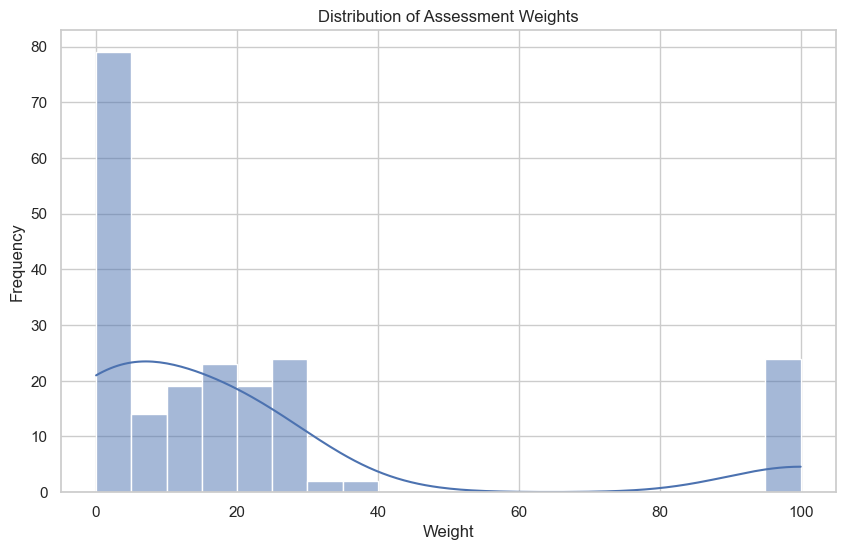

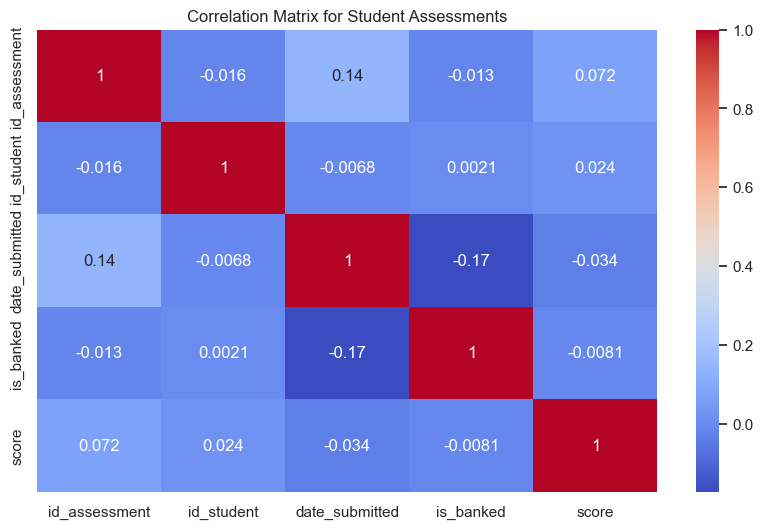

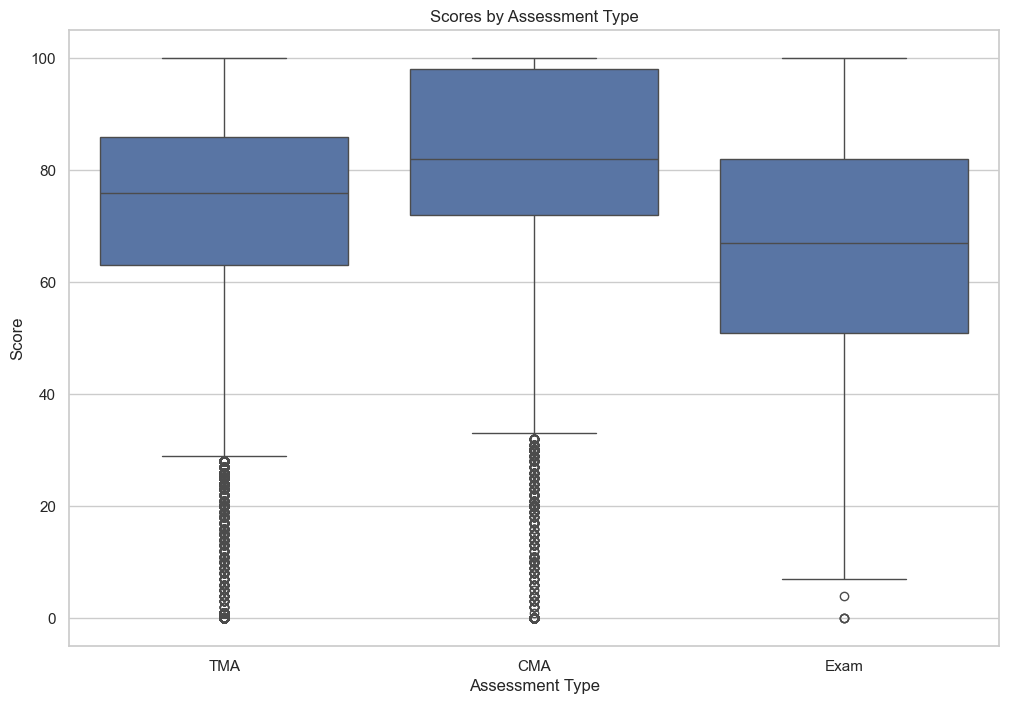

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive Statistics and Visualization

# Example: Summary statistics for all datasets
for name, df in dataframes.items():
    print(f"Summary statistics for the {name} dataset:")
    display(df.describe(include='all'))

# Example: Distribution of assessment weights
if not dataframes["assessments"].empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataframes["assessments"]["weight"], bins=20, kde=True)
    plt.title("Distribution of Assessment Weights")
    plt.xlabel("Weight")
    plt.ylabel("Frequency")
    plt.show()

# Example: Correlation matrix for student assessments
if not dataframes["student_assessment"].empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframes["student_assessment"].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix for Student Assessments")
    plt.show()

# Example: Box plot of scores by assessment type
if not dataframes["assessments"].empty and not dataframes["student_assessment"].empty:
    merged_df = pd.merge(dataframes["student_assessment"], dataframes["assessments"], on="id_assessment")
    plt.figure(figsize=(12, 8))
    sns.boxplot(x="assessment_type", y="score", data=merged_df)
    plt.title("Scores by Assessment Type")
    plt.xlabel("Assessment Type")
    plt.ylabel("Score")
    plt.show()

In [18]:
# Feature Engineering

# Example: Create a new feature 'days_to_submit' in the student_assessment dataset
if not dataframes["student_assessment"].empty and not dataframes["assessments"].empty:
    merged_df = pd.merge(dataframes["student_assessment"], dataframes["assessments"], on="id_assessment")
    merged_df["days_to_submit"] = merged_df["date_submitted"] - merged_df["date"]
    dataframes["student_assessment"] = merged_df

# Display the newly created feature
if not dataframes["student_assessment"].empty:
    print("New feature 'days_to_submit' added to the student_assessment dataset:")
    display(dataframes["student_assessment"].head())

New feature 'days_to_submit' added to the student_assessment dataset:


,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,days_to_submit
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19,10.0,-1
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19,10.0,3
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19,10.0,-2
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19,10.0,7
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19,10.0,0


Linear Regression - Mean Squared Error: 339.09, R2 Score: 0.03
Random Forest Regressor - Mean Squared Error: 289.99, R2 Score: 0.17


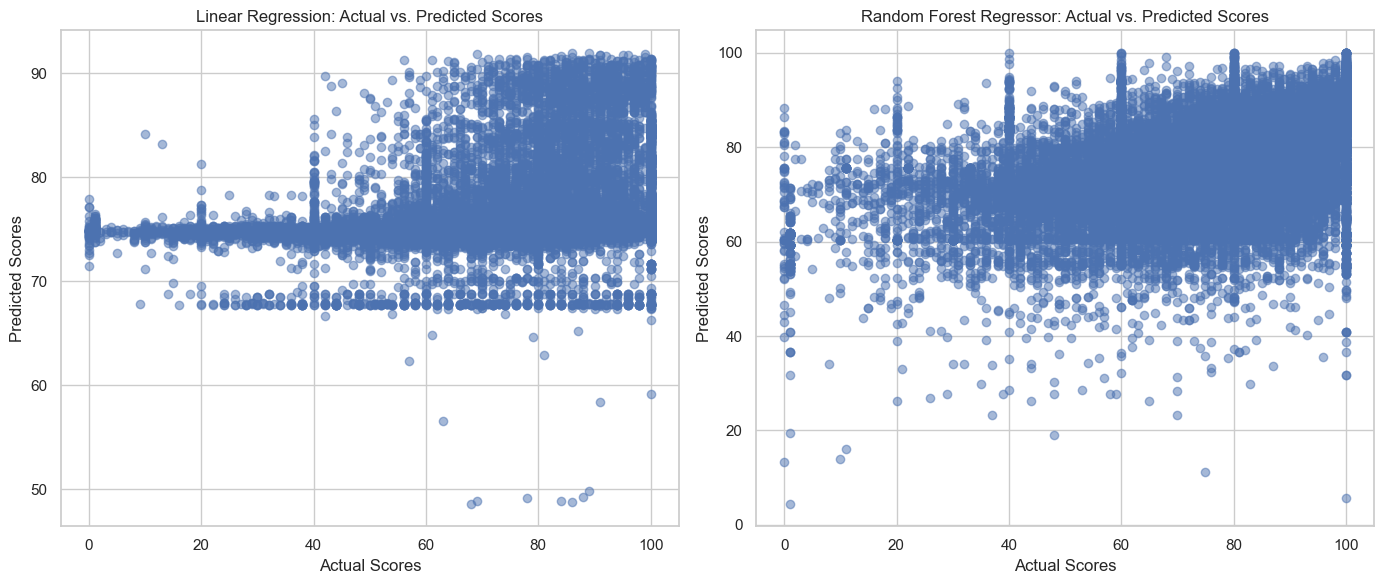

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Predictive Modeling

# Prepare data for modeling
if not dataframes["student_assessment"].empty:
    features = ["id_assessment", "date_submitted", "is_banked", "days_to_submit"]
    target = "score"
    
    X = dataframes["student_assessment"][features]
    y = dataframes["student_assessment"][target]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train a linear regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    
    # Train a random forest regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    lr_pred = lr_model.predict(X_test_scaled)
    rf_pred = rf_model.predict(X_test_scaled)
    
    # Evaluate the models
    lr_mse = mean_squared_error(y_test, lr_pred)
    lr_r2 = r2_score(y_test, lr_pred)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_r2 = r2_score(y_test, rf_pred)
    
    print(f"Linear Regression - Mean Squared Error: {lr_mse:.2f}, R2 Score: {lr_r2:.2f}")
    print(f"Random Forest Regressor - Mean Squared Error: {rf_mse:.2f}, R2 Score: {rf_r2:.2f}")

    # Plot actual vs. predicted scores for both models
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, lr_pred, alpha=0.5)
    plt.title("Linear Regression: Actual vs. Predicted Scores")
    plt.xlabel("Actual Scores")
    plt.ylabel("Predicted Scores")
    
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, rf_pred, alpha=0.5)
    plt.title("Random Forest Regressor: Actual vs. Predicted Scores")
    plt.xlabel("Actual Scores")
    plt.ylabel("Predicted Scores")
    
    plt.tight_layout()
    plt.show()

In [21]:
# Verify columns in the assessments DataFrame
print("Columns in assessments DataFrame:")
print(dataframes["assessments"].columns)

Columns in assessments DataFrame:
Index(['code_module', 'code_presentation', 'id_assessment', 'assessment_type',
       'date', 'weight'],
      dtype='object')


In [22]:
# Verify the merge operation and columns in the merged DataFrame
merged_df = pd.merge(dataframes["student_assessment"], dataframes["assessments"], on="id_assessment")
print("Columns in merged DataFrame:")
print(merged_df.columns)

Columns in merged DataFrame:
Index(['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score',
       'code_module_x', 'code_presentation_x', 'assessment_type_x', 'date_x',
       'weight_x', 'days_to_submit', 'code_module_y', 'code_presentation_y',
       'assessment_type_y', 'date_y', 'weight_y'],
      dtype='object')


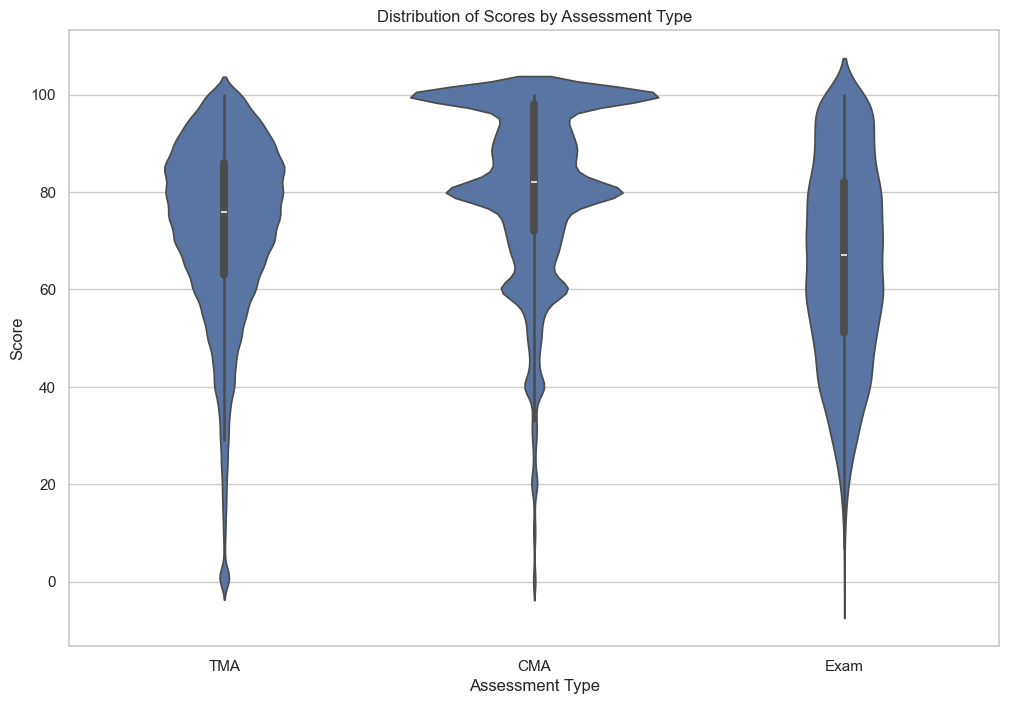

In [24]:
# Advanced Visualization

# Plot the Violin Plot using the correct column name - Example: Violin plot of scores by assessment type
plt.figure(figsize=(12, 8))
sns.violinplot(x="assessment_type_y", y="score", data=merged_df)
plt.title("Distribution of Scores by Assessment Type")
plt.xlabel("Assessment Type")
plt.ylabel("Score")
plt.show()

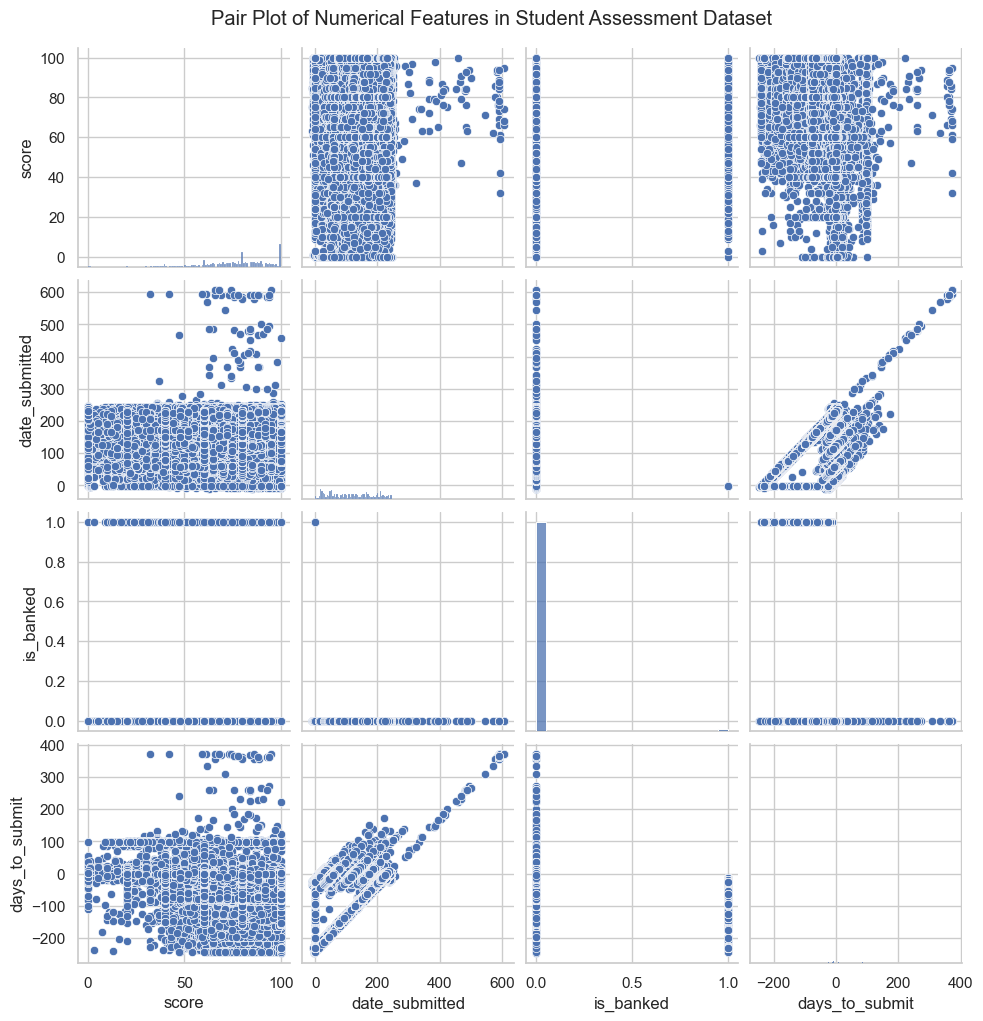

In [25]:
# Example: Pair plot of numerical features in student_assessment dataset
if not dataframes["student_assessment"].empty:
    sns.pairplot(dataframes["student_assessment"][["score", "date_submitted", "is_banked", "days_to_submit"]])
    plt.suptitle("Pair Plot of Numerical Features in Student Assessment Dataset", y=1.02)
    plt.show()

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
datasets = {
    "assessments": "assessments.csv",
    "courses": "courses.csv",
    "student_assessment": "studentAssessment.csv",
    "student_registration": "studentRegistration.csv",
    "vle": "vle.csv",
    "student_vle": "studentVle.csv"
}

In [27]:
dataframes = {name: pd.read_csv(path) for name, path in datasets.items()}

In [28]:
# Merge dataframes for analysis
merged_df = pd.merge(dataframes["student_assessment"], dataframes["assessments"], on="id_assessment")

In [30]:
# Select only the numeric columns
numeric_cols = merged_df.select_dtypes(include=[np.number])

In [31]:
# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_cols.corr()

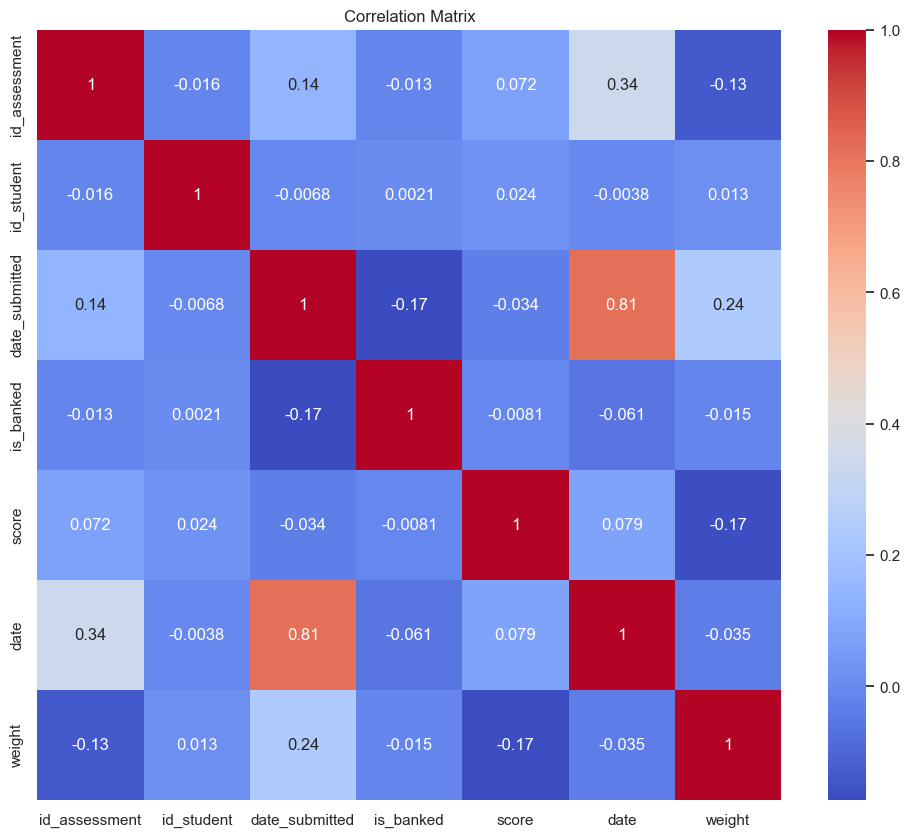

In [32]:
# Exploratory Data Analysis (EDA)

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

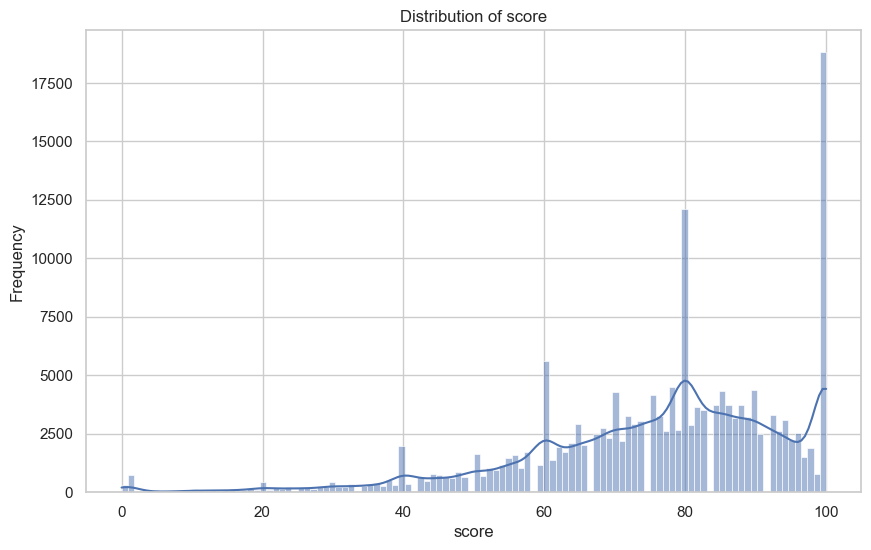

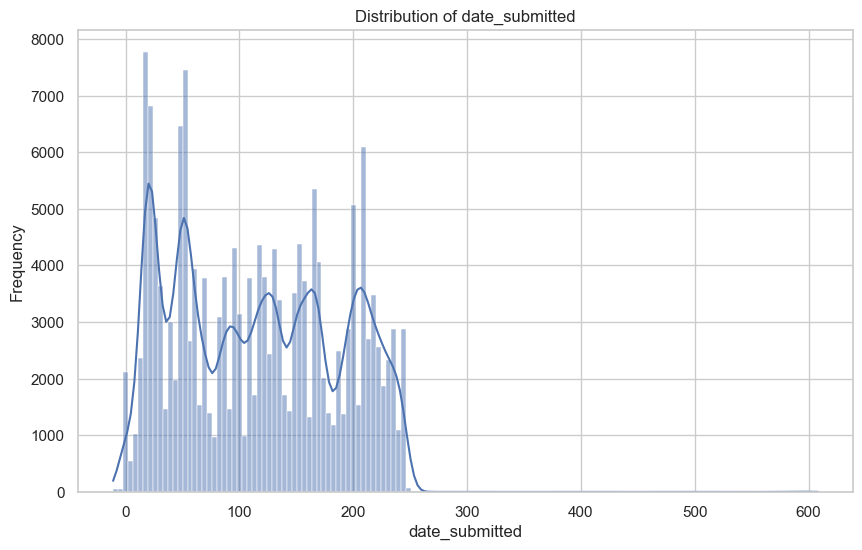

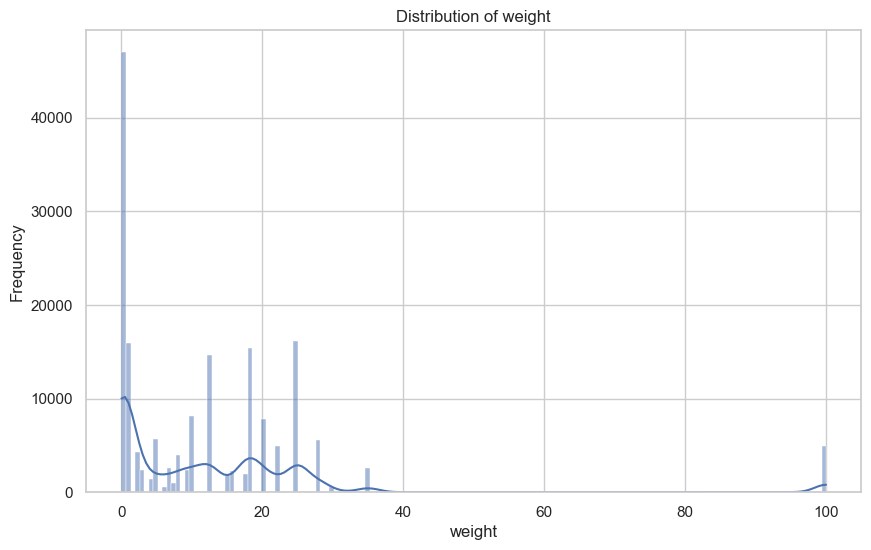

In [33]:
# Distribution of Numerical Features
numerical_features = ["score", "date_submitted", "weight"]
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

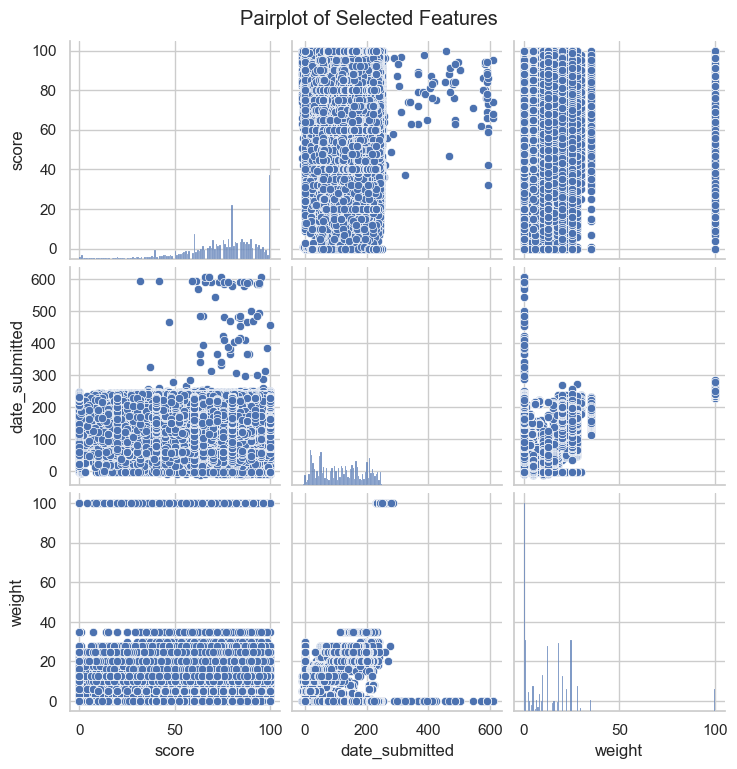

In [34]:
# Pairplot of Selected Features
selected_features = ["score", "date_submitted", "weight"]
sns.pairplot(merged_df[selected_features])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [38]:
# Check the column names in the merged DataFrame
print("Columns in merged DataFrame:")
print(merged_df.columns)

Columns in merged DataFrame:
Index(['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score',
       'code_module', 'code_presentation', 'assessment_type', 'date',
       'weight'],
      dtype='object')


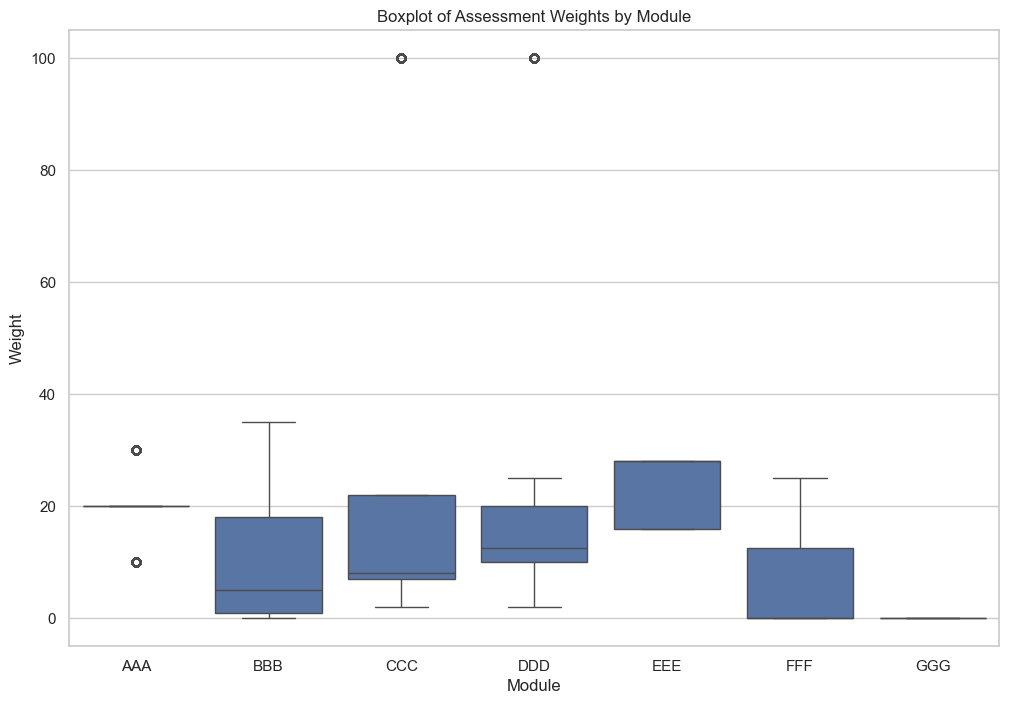

In [39]:
# Boxplot of Assessment Weights by Module
plt.figure(figsize=(12, 8))
sns.boxplot(x="code_module", y="weight", data=merged_df)
plt.title("Boxplot of Assessment Weights by Module")
plt.xlabel("Module")
plt.ylabel("Weight")
plt.show()

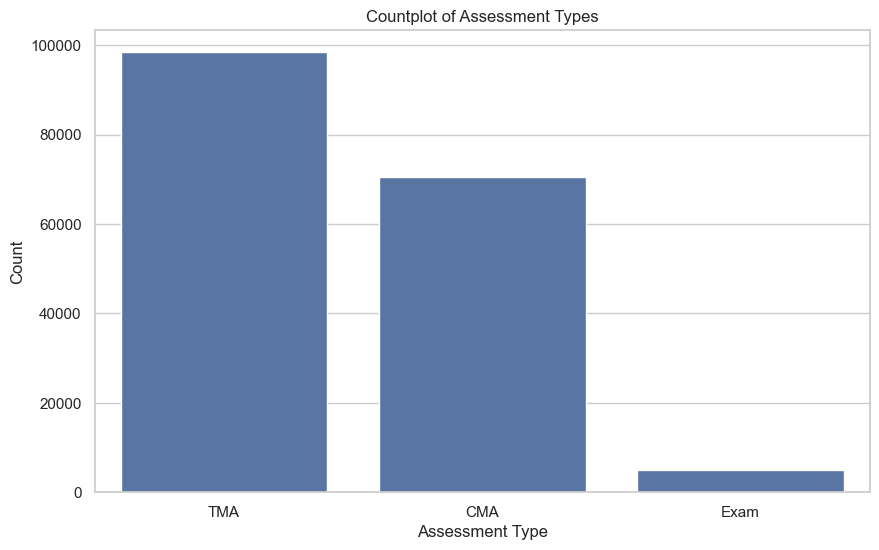

In [41]:
# Countplot of Assessment Types
plt.figure(figsize=(10, 6))
sns.countplot(x="assessment_type", data=merged_df)
plt.title("Countplot of Assessment Types")
plt.xlabel("Assessment Type")
plt.ylabel("Count")
plt.show()

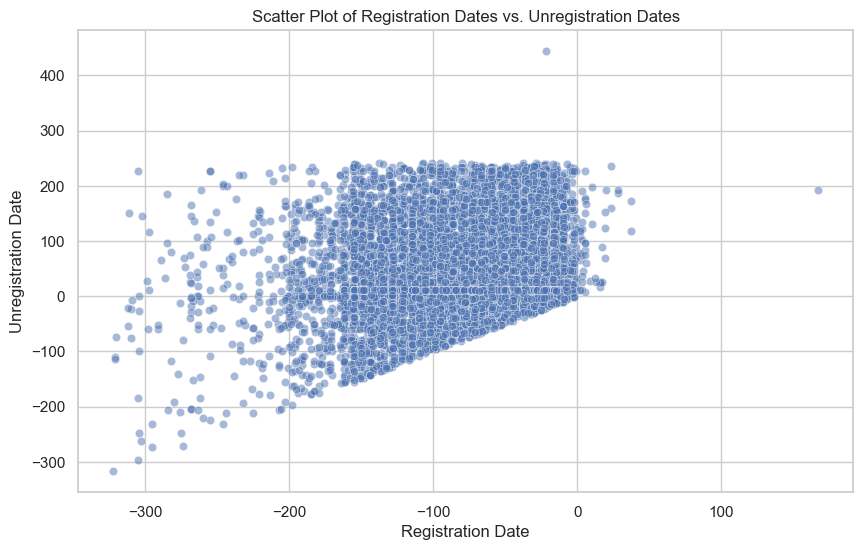

In [42]:
# Scatter Plot of Registration Dates vs. Unregistration Dates
if not dataframes["student_registration"].empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="date_registration", y="date_unregistration", data=dataframes["student_registration"], alpha=0.5)
    plt.title("Scatter Plot of Registration Dates vs. Unregistration Dates")
    plt.xlabel("Registration Date")
    plt.ylabel("Unregistration Date")
    plt.show()

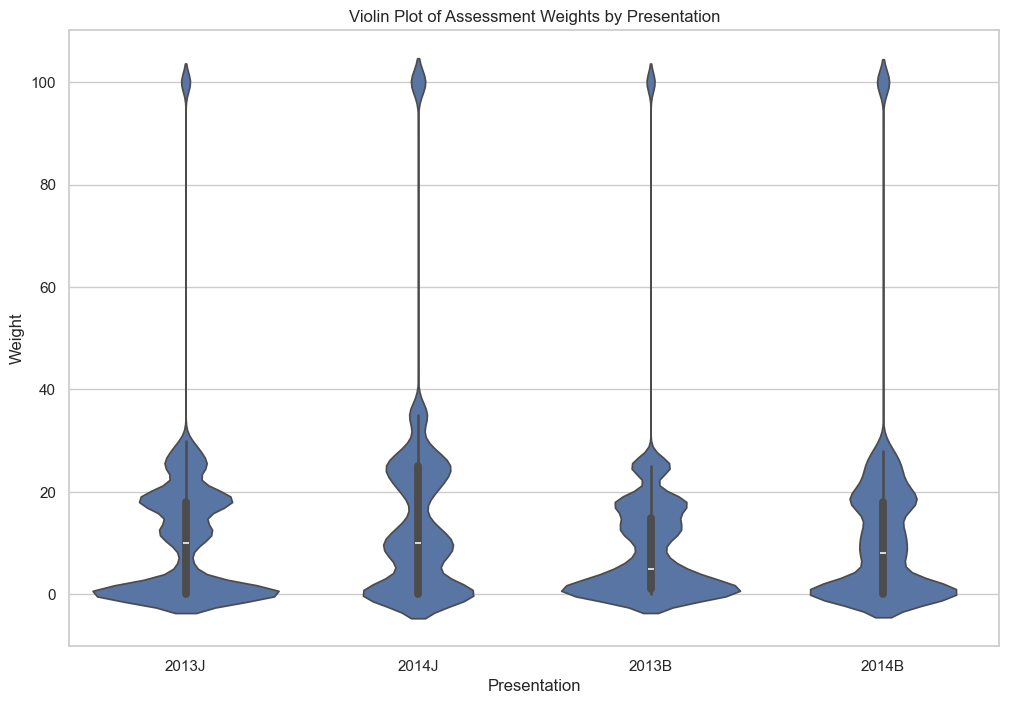

In [44]:
# Violin Plot of Assessment Weights by Presentation
plt.figure(figsize=(12, 8))
sns.violinplot(x="code_presentation", y="weight", data=merged_df)
plt.title("Violin Plot of Assessment Weights by Presentation")
plt.xlabel("Presentation")
plt.ylabel("Weight")
plt.show()

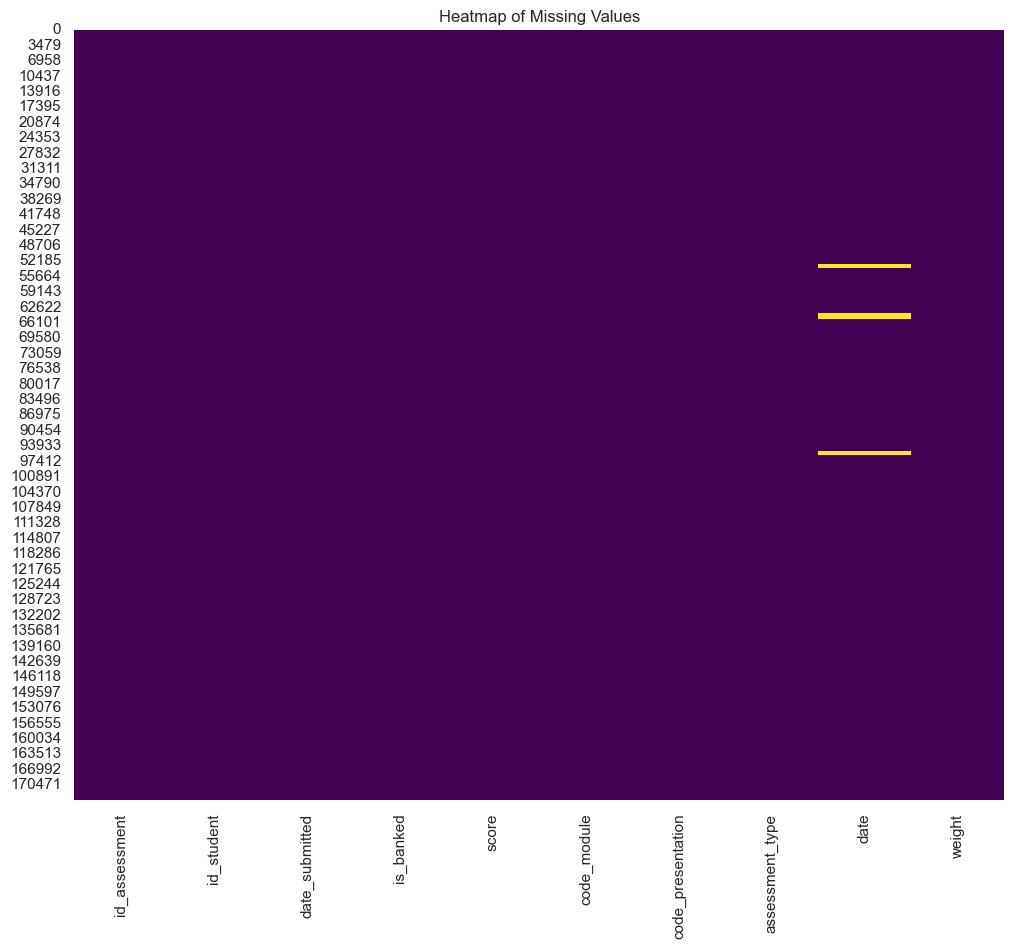

In [45]:
# Heatmap of Missing Values
plt.figure(figsize=(12, 10))
sns.heatmap(merged_df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [54]:
dataframes = {name: pd.read_csv(path) for name, path in datasets.items()}

# Merge dataframes for analysis
merged_df = pd.merge(dataframes["student_assessment"], dataframes["assessments"], on="id_assessment")

In [58]:
%pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import missingno as msno

<Figure size 1200x800 with 0 Axes>

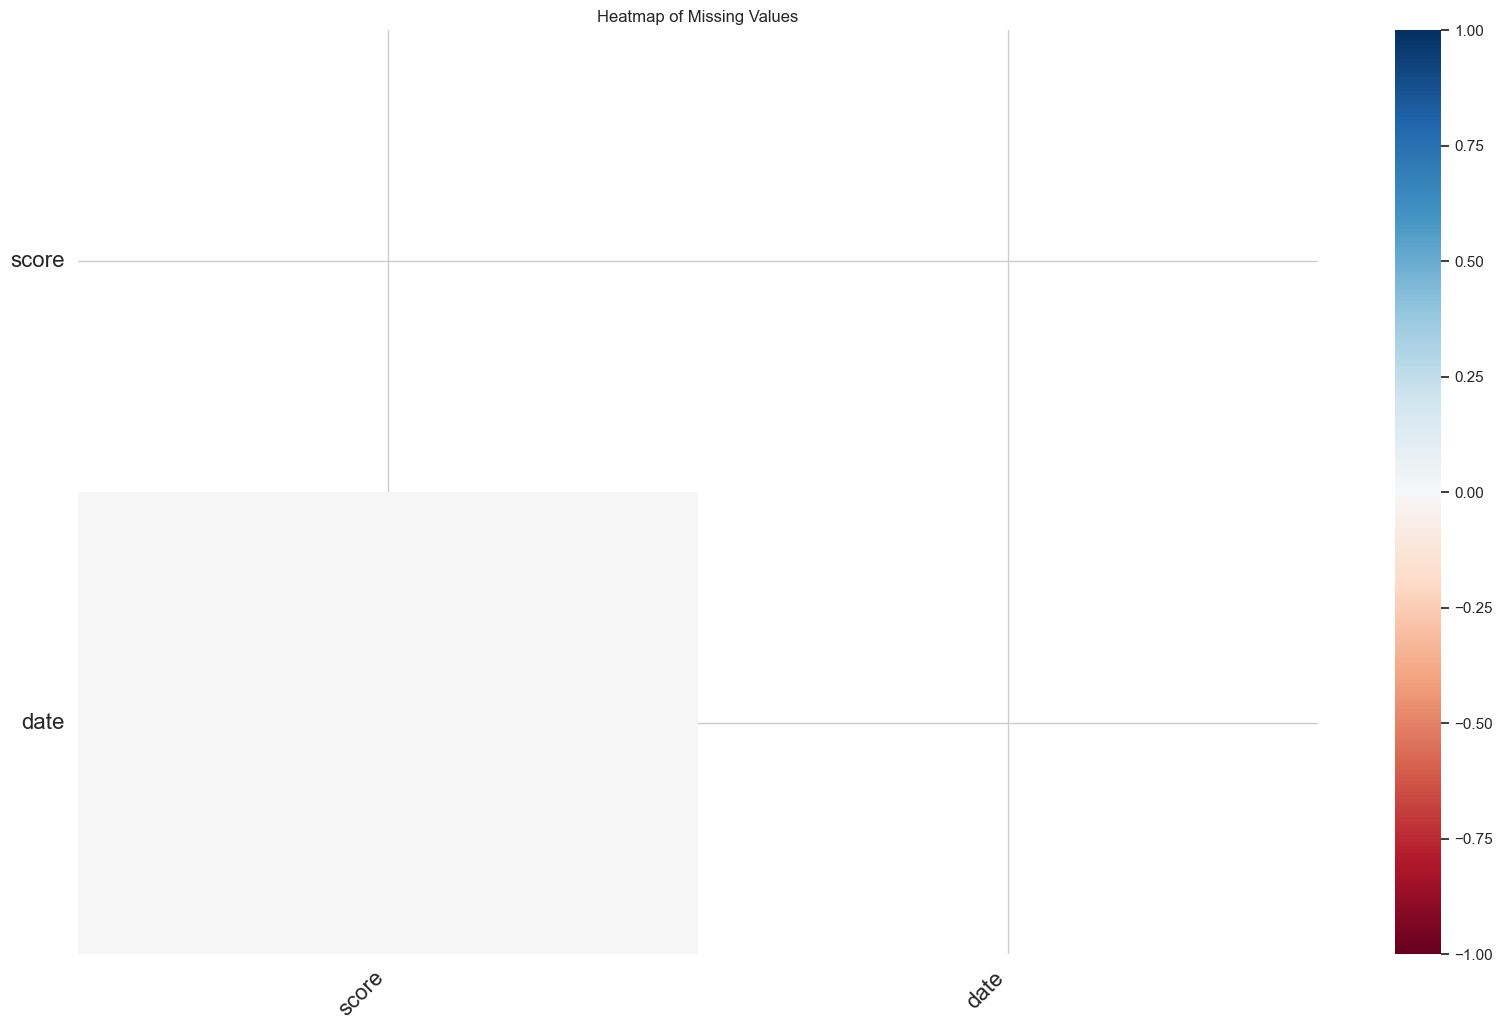

In [60]:
# Create a heatmap of missing values using missingno
plt.figure(figsize=(12, 8))
msno.heatmap(merged_df)
plt.title("Heatmap of Missing Values")
plt.show()

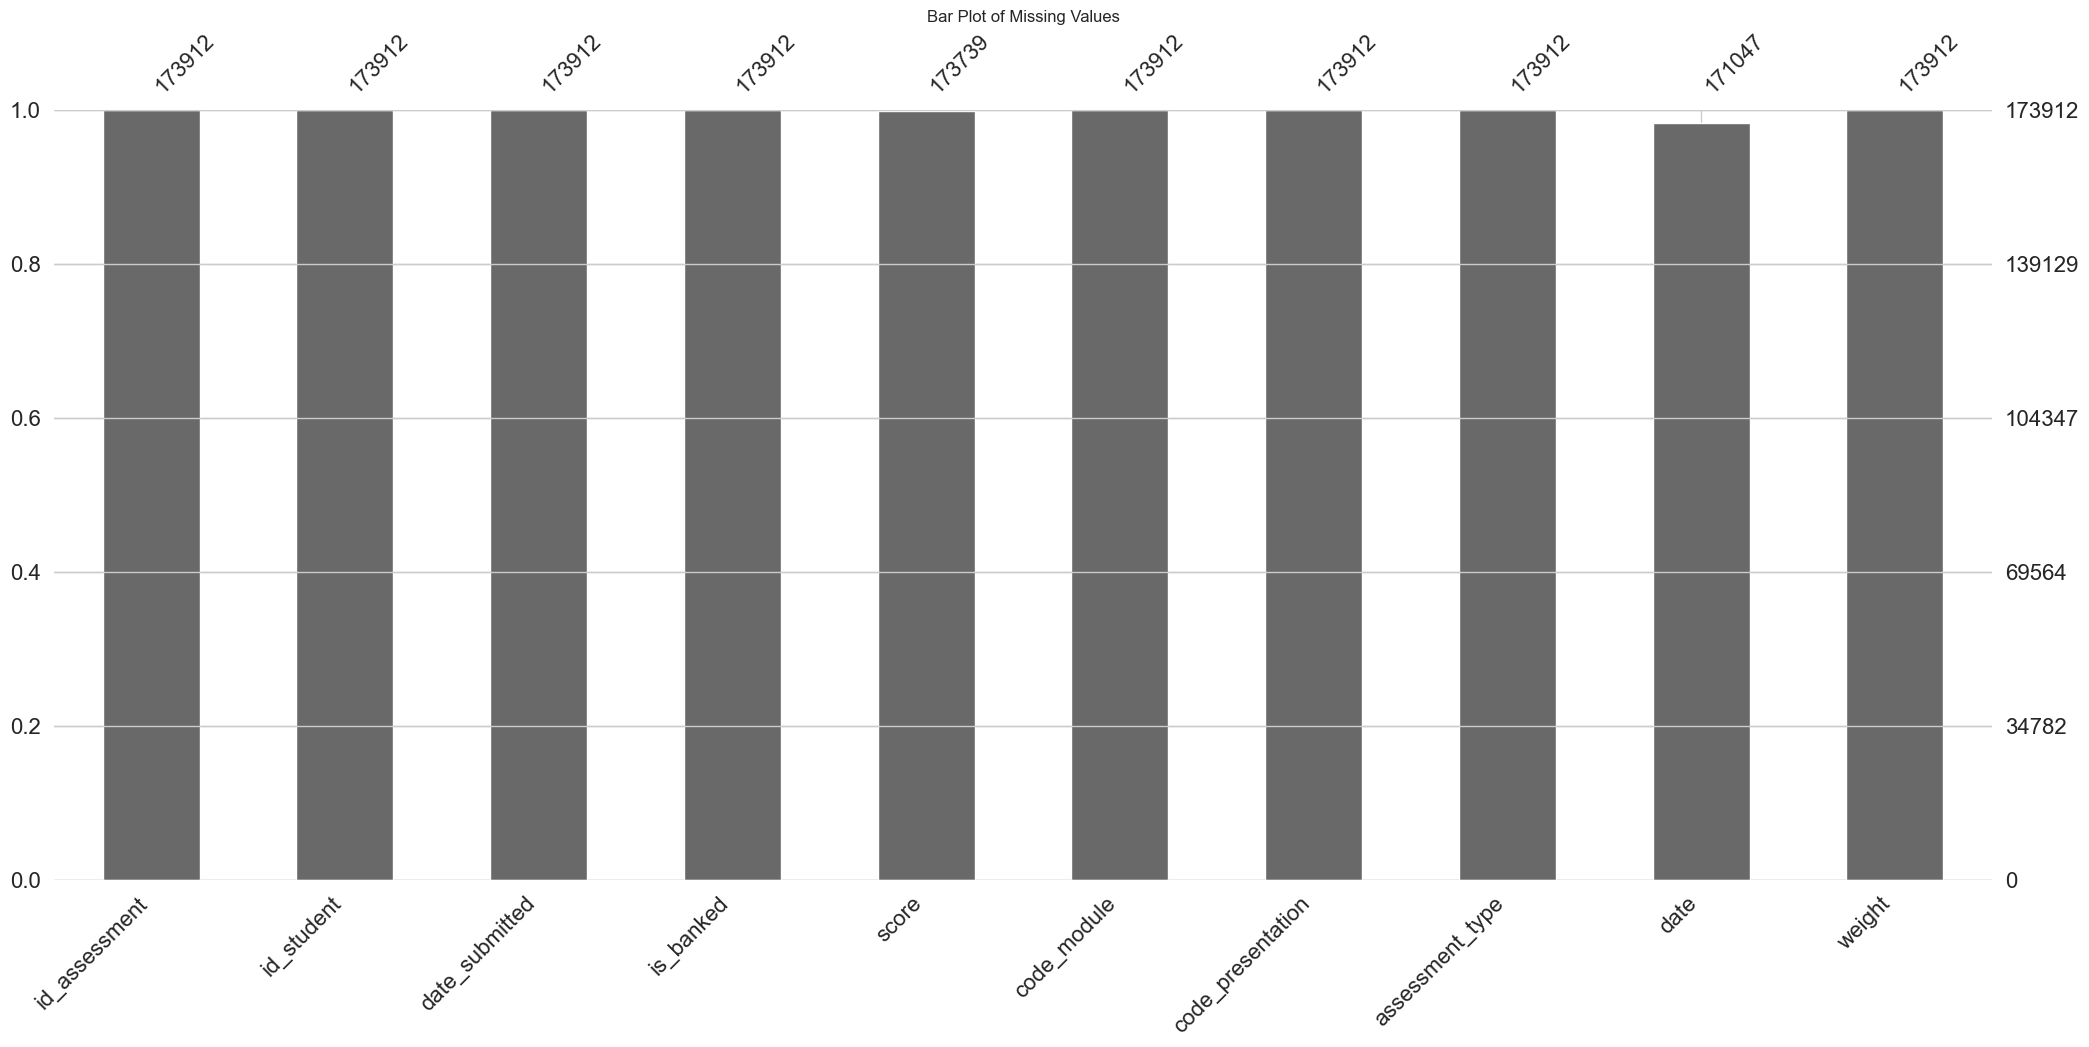

<Figure size 1200x800 with 0 Axes>

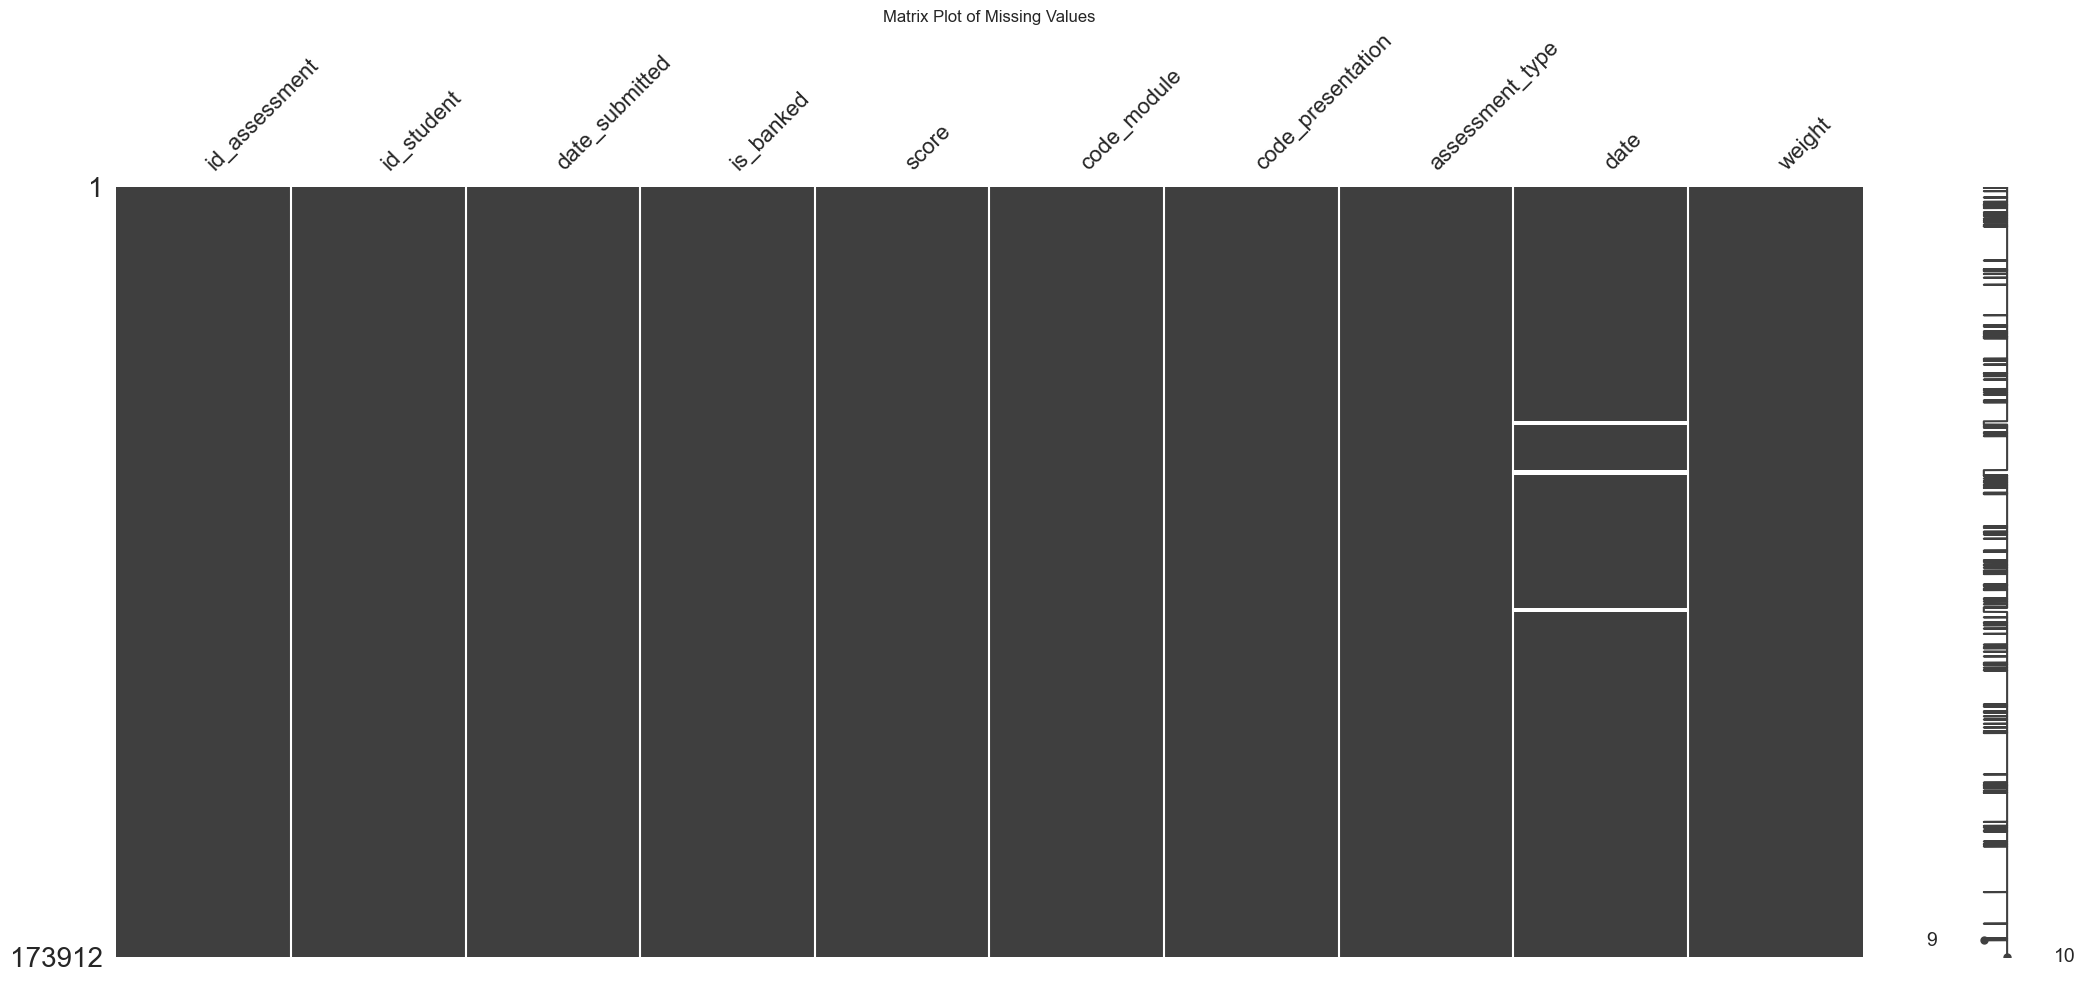

In [61]:
# Bar plot of missing values
plt.figure(figsize=(12, 8))
msno.bar(merged_df)
plt.title("Bar Plot of Missing Values")
plt.show()

# Matrix plot of missing values
plt.figure(figsize=(12, 8))
msno.matrix(merged_df)
plt.title("Matrix Plot of Missing Values")
plt.show()

In [46]:
# Summary Statistics of Numerical Features
print("Summary Statistics of Numerical Features:")
print(merged_df.describe(include=[np.number]))

Summary Statistics of Numerical Features:
       id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.000000   
mean    26553.803556  7.051507e+05      116.032942       0.010977   
std      8829.784254  5.523952e+05       71.484148       0.104194   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     15022.000000  5.044290e+05       51.000000       0.000000   
50%     25359.000000  5.852080e+05      116.000000       0.000000   
75%     34883.000000  6.344980e+05      173.000000       0.000000   
max     37443.000000  2.698588e+06      608.000000       1.000000   

               score           date         weight  
count  173739.000000  171047.000000  173912.000000  
mean       75.799573     130.605623      12.743899  
std        18.798107      78.025175      17.877301  
min         0.000000      12.000000       0.000000  
25%        65.000000      54.000000       0.000000  
50%        80.0000

C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_64912\572352708.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="code_module", y="weight", hue="code_presentation", data=merged_df, ci=None)


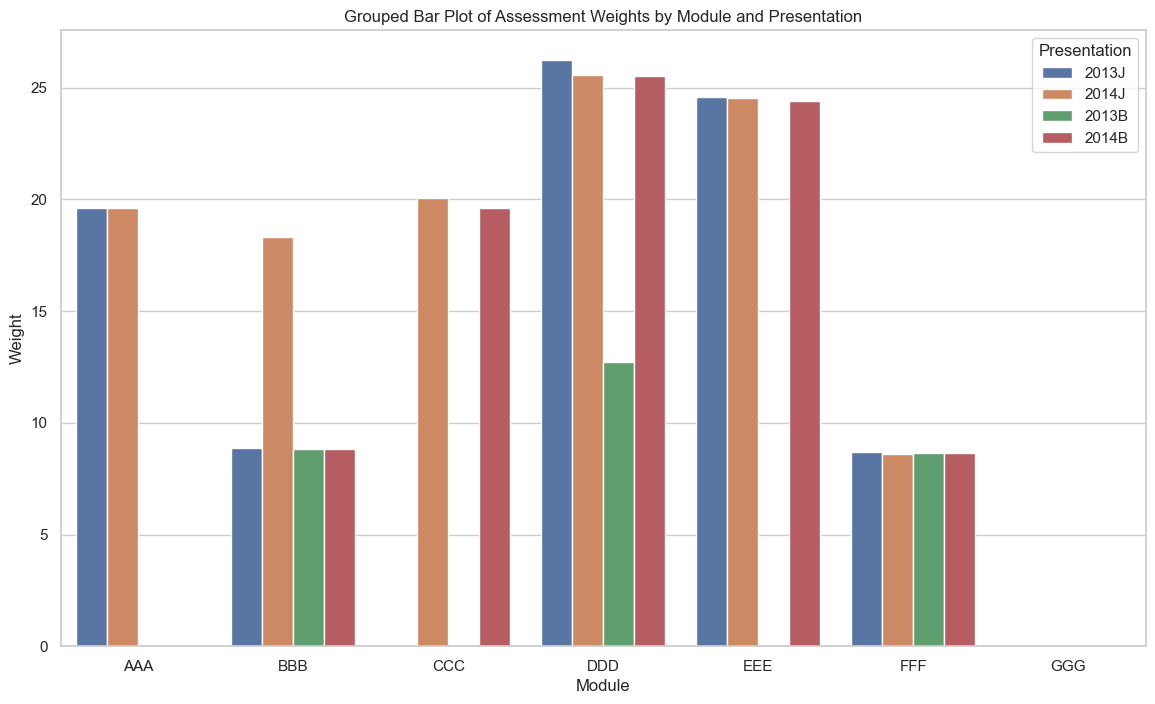

In [48]:
# Grouped Bar Plot of Assessment Weights by Module and Presentation
plt.figure(figsize=(14, 8))
sns.barplot(x="code_module", y="weight", hue="code_presentation", data=merged_df, ci=None)
plt.title("Grouped Bar Plot of Assessment Weights by Module and Presentation")
plt.xlabel("Module")
plt.ylabel("Weight")
plt.legend(title="Presentation")
plt.show()

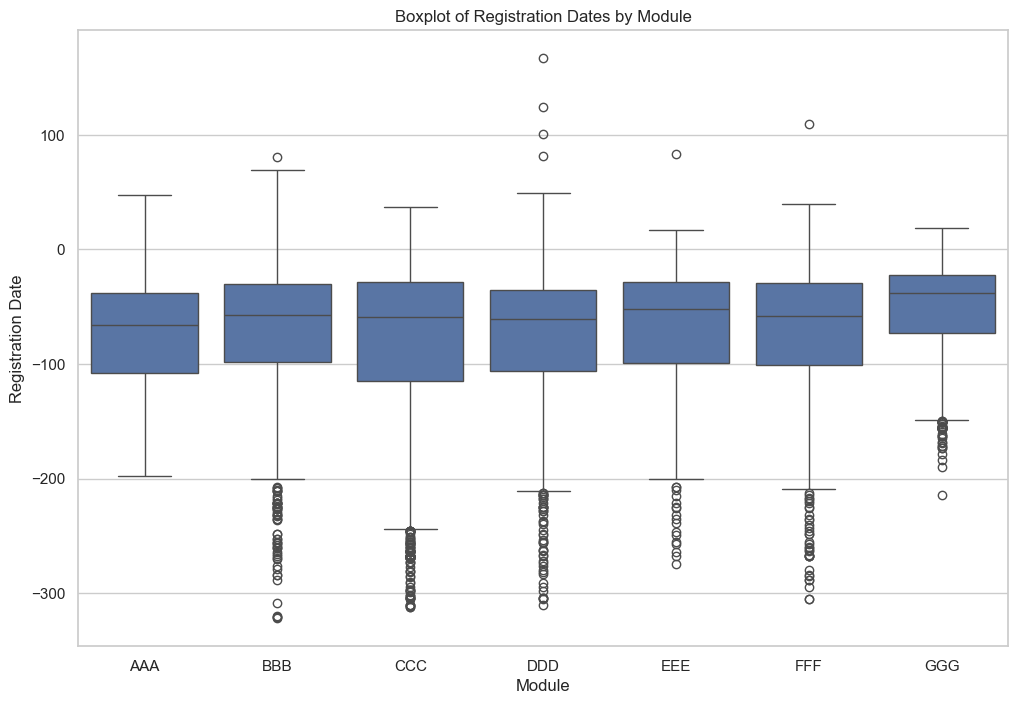

In [49]:
# Boxplot of Registration Dates by Module
if not dataframes["student_registration"].empty:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x="code_module", y="date_registration", data=dataframes["student_registration"])
    plt.title("Boxplot of Registration Dates by Module")
    plt.xlabel("Module")
    plt.ylabel("Registration Date")
    plt.show()

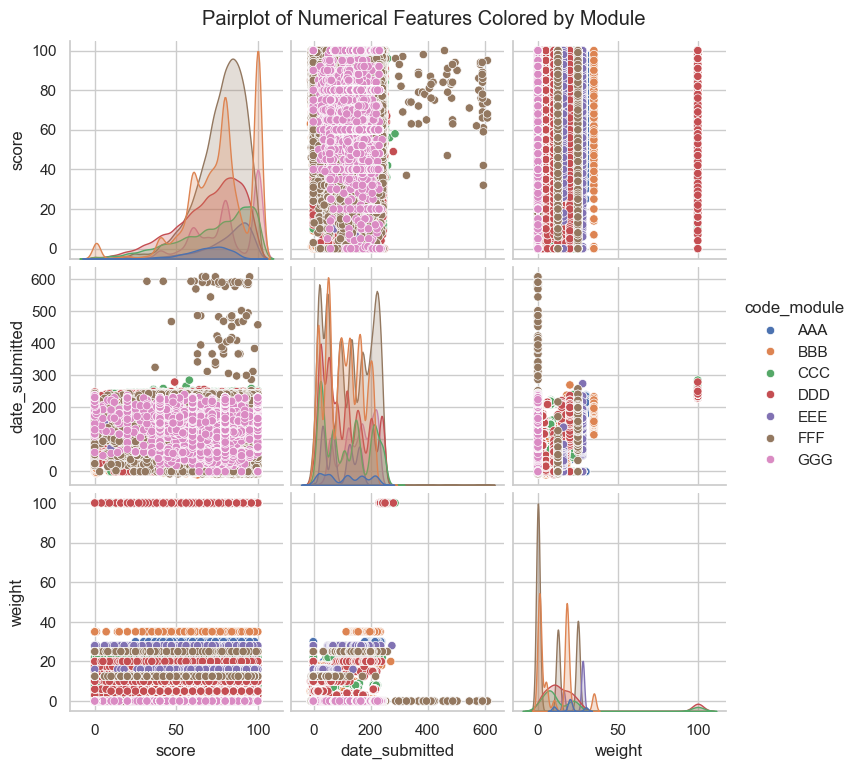

In [52]:
# Pairplot of Numerical Features Colored by Module
sns.pairplot(merged_df[selected_features + ["code_module"]], hue="code_module")
plt.suptitle("Pairplot of Numerical Features Colored by Module", y=1.02)
plt.show()